In [1]:
import sys
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import gc

from augmentation import augment
from data_generator import DOTASequence, SegmentationSequence
import model_builder
import accuracy

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 2080, compute capability 7.5


In [2]:
annot_path = 'data/train/annotations' #Path to directory of annotations
images_path = 'data/train/images' #Path to directory of images
generator = DOTASequence(images_path, annot_path, augmenter = augment)

In [ ]:
idx = 4
imgbatch, annotbatch = generator[idx]
img = imgbatch[0]
annot = annotbatch[0]

plt.figure(figsize = (25,25))

for line in annot:
    p1 = int(line[0]), int(line[1])
    p2 = int(line[2]), int(line[3])
    p3 = int(line[4]), int(line[5])
    p4 = int(line[6]), int(line[7])
    
    color = (0,255,255)
    cv2.line(img, p1, p2, color,2)
    cv2.line(img, p2, p3, color,2)
    cv2.line(img, p3, p4, color,2)
    cv2.line(img, p4, p1, color,2)

plt.imshow(img)

In [6]:
# Dank new visualizer for mask utilities and revamp augmentation function below vvvvvvvv

import augmentation
import masks
import cv2
import os
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
img_path = "./data/train/images"
box_path = "./data/train/annotations"
mask_path = "./data/masks"

if not(os.path.exists(mask_path)):
    os.makedirs(mask_path)

image_names = [x[:-4] for x in os.listdir(img_path) if x.endswith(".png")]

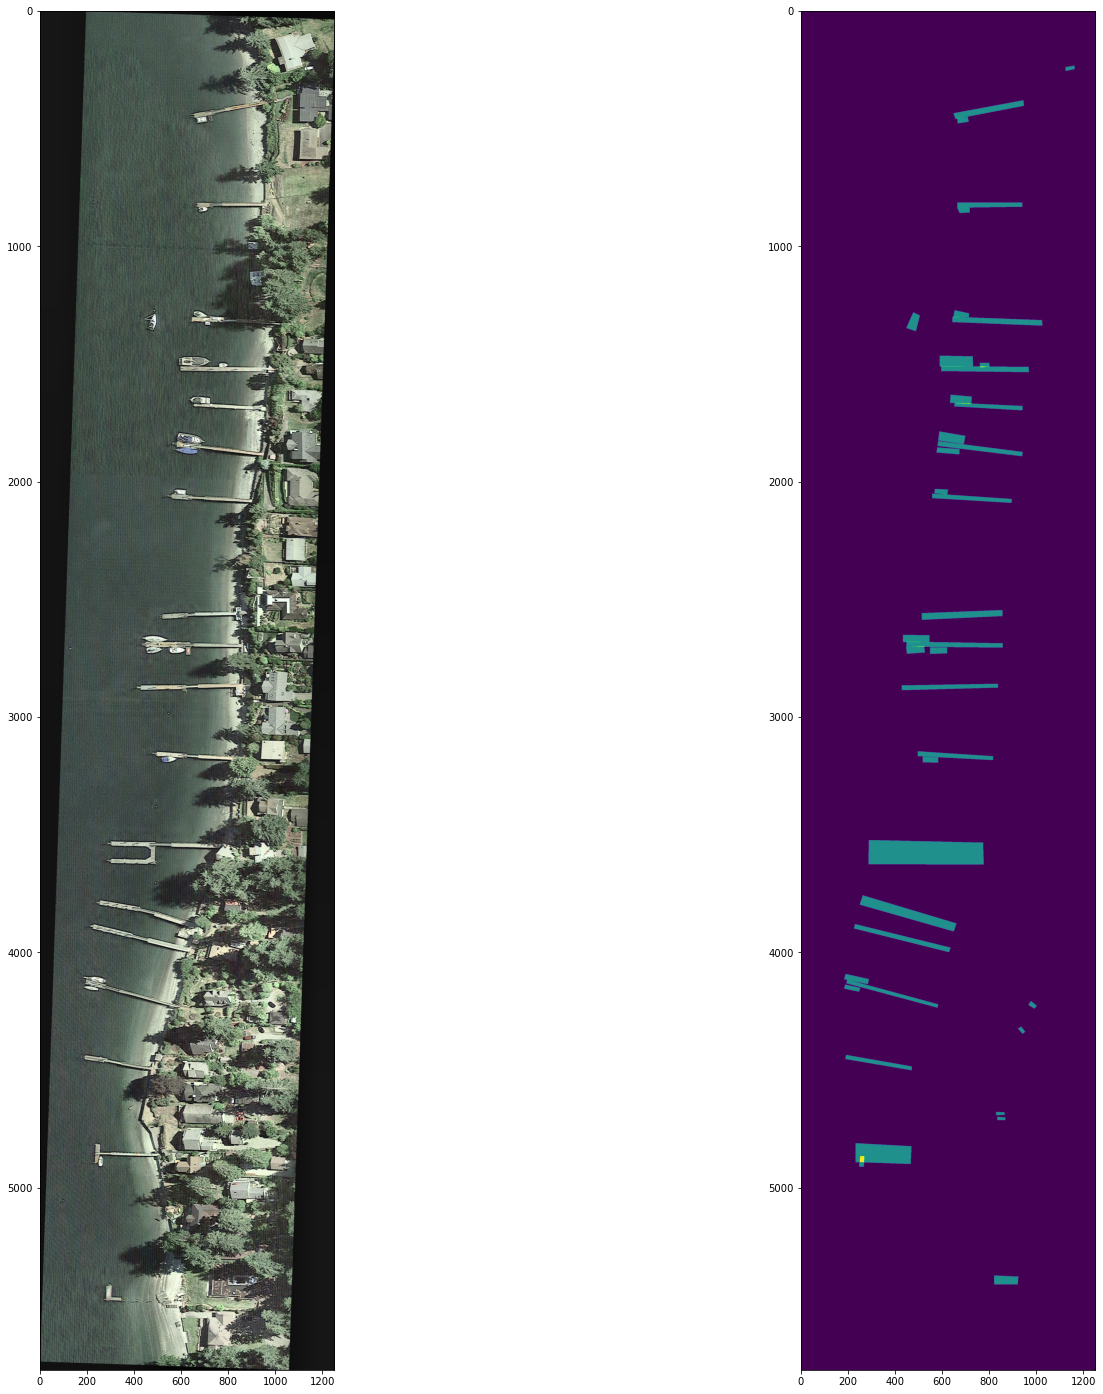

In [8]:
n = 1
index = image_names[n]

masks.save_mask(img_path, box_path, index, mask_path)
img = cv2.imread(os.path.join(img_path, index + '.png'))
mask = masks.load_mask(mask_path, index)

aimg, amask = augmentation.augment(img,mask)

agmask = np.zeros((amask.shape[0],amask.shape[1]),dtype = np.uint8)
for i in range(16):
    agmask = agmask + (amask[:,:,i])

plt.figure(figsize = (25,25))
plt.subplot(121)
plt.imshow(aimg)
plt.subplot(122)
plt.imshow(agmask)

P0000
P0001


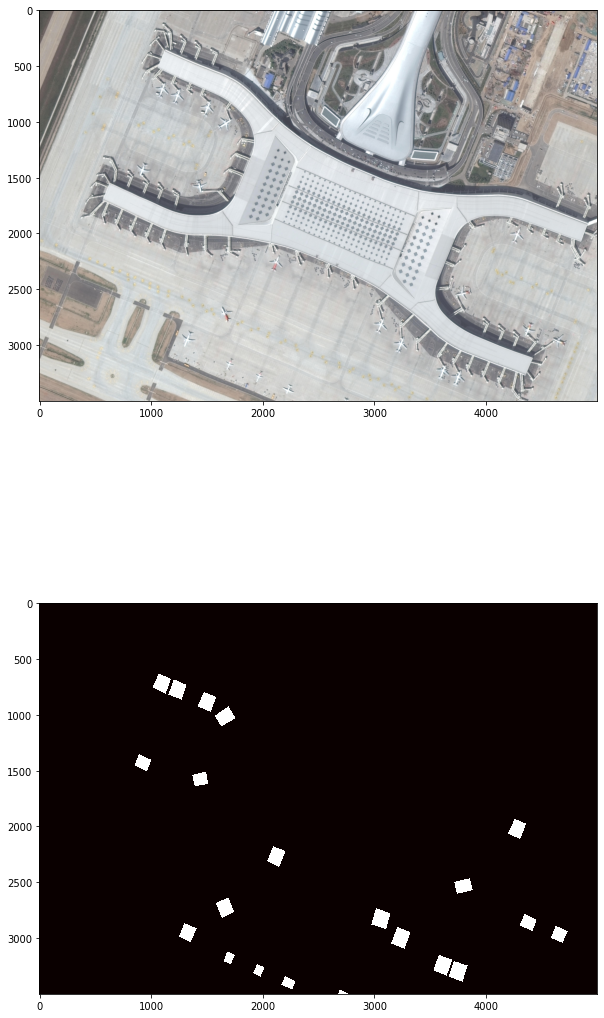

In [4]:
seg_generator = SegmentationSequence(images_path, annot_path, augmenter = augment, output_img_size=(5000, 3500))
img, mask = seg_generator[0]
img = img[0].astype(np.uint8)
mask = mask[0]
fig = plt.figure(figsize=(10,20))
fig.add_subplot(2, 1, 1)
plt.imshow(img)
fig.add_subplot(2, 1, 2)
plt.imshow(mask[:,:,0], cmap="hot", interpolation="nearest")

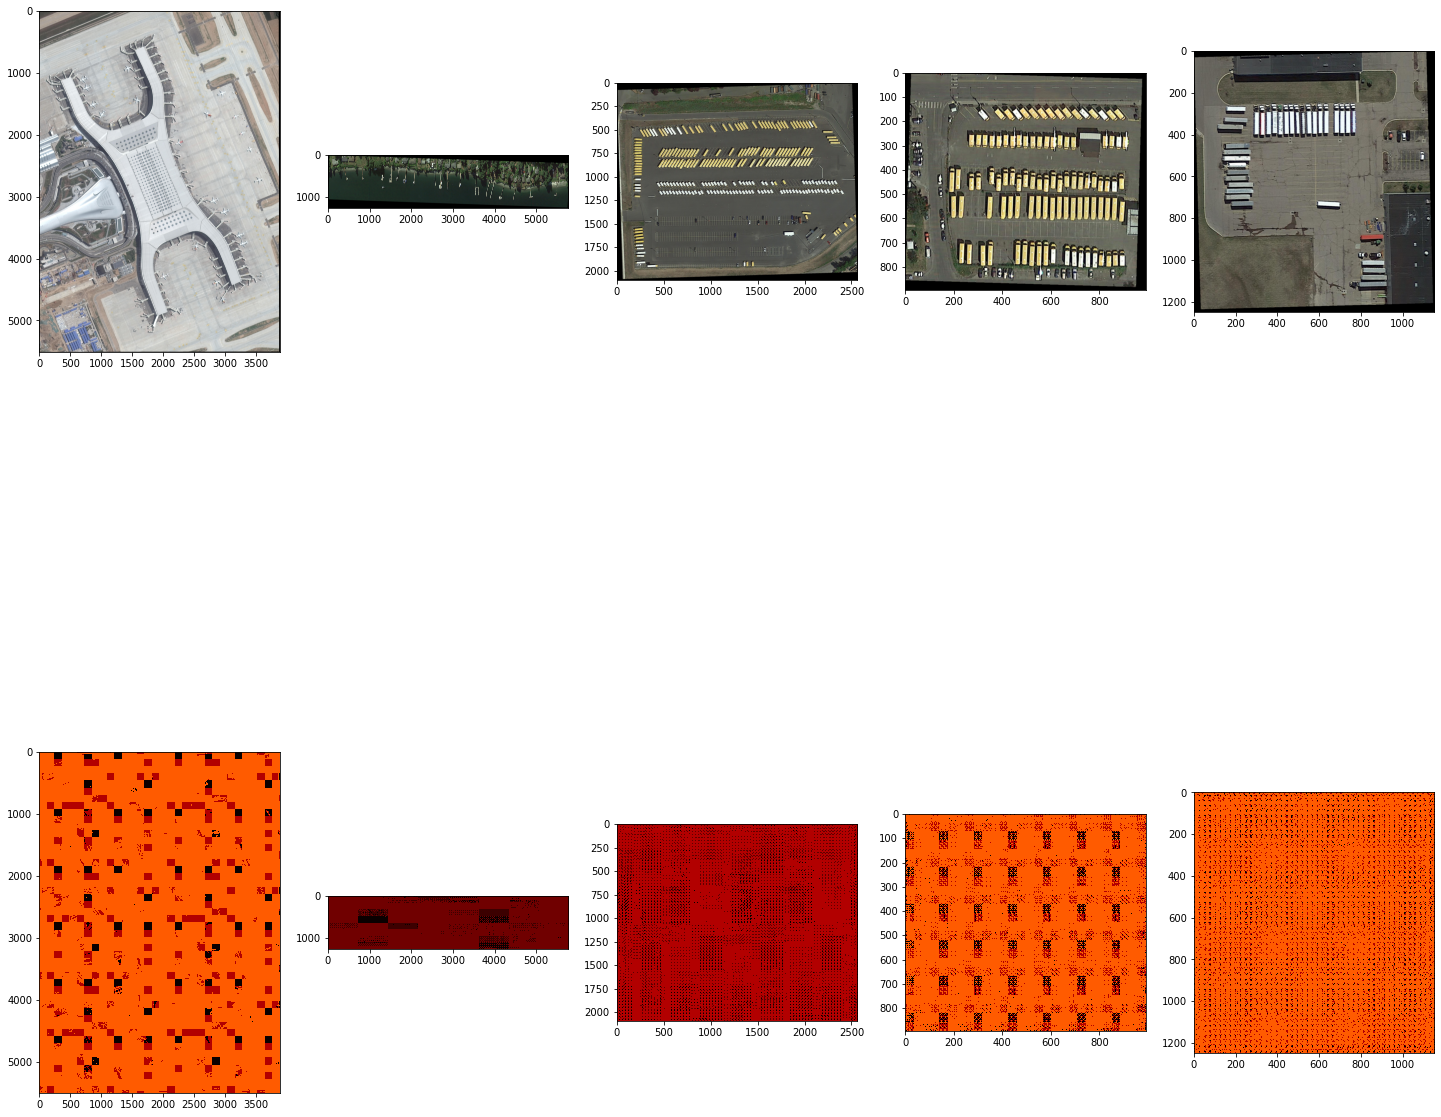

In [7]:
model = model_builder.build_segmentation_model((None, None, 3), 4, 3, 8, 16)
imgbatch, annotbatch = generator[0]
fig = plt.figure(figsize=(25, 25))
for i, img in enumerate(imgbatch):
    padded_img = np.zeros(
        (1, (img.shape[0] // 16 + 1) * 16, (img.shape[1] // 16 + 1) * 16, 3)
    )
    padded_img[0, : img.shape[0], : img.shape[1], :] = img
    pred = model.predict(padded_img)
    pred = np.argmax(pred, axis=3)[0]
    fig.add_subplot(2, 5, i + 1)
    plt.imshow(padded_img[0].astype(np.uint8))
    fig.add_subplot(2, 5, i + 6)
    plt.imshow(pred, cmap="hot", interpolation="nearest")

In [10]:
model = tf.keras.models.load_model(".\\ckpts", compile=False, custom_objects={'iou_coef': accuracy.iou_coef})

P0000


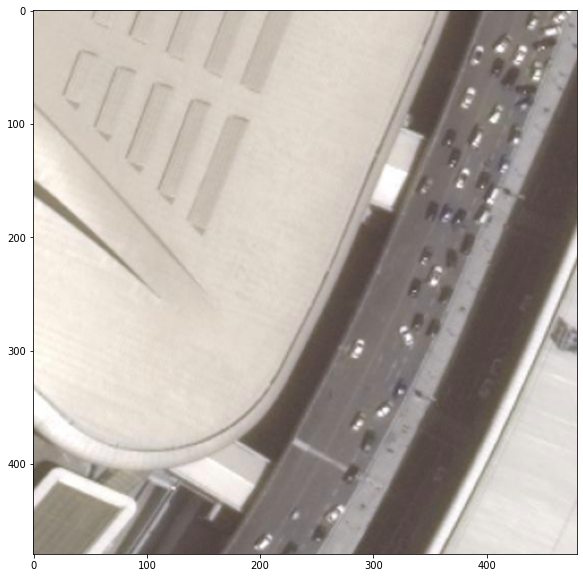

ValueError: Unsupported dtype

In [11]:
seg_generator = SegmentationSequence(
        ".\\data\\train\\images", ".\\data\\train\\annotations", batch_size=1
    )
for i in range(30):
    img, mask = seg_generator[0]

img.shape = (1, 480, 480, 3)
mask.shape = (1, 480, 480, 16)
plt.figure(figsize=(10,10))
plt.imshow(img[0])
pred = model.predict(img)[0]
pred = pred * 255
pred = pred.astype(np.uint8)
fig = plt.figure(figsize=(8,48))
for cnum in range(16):
    fig.add_subplot(16, 2, 2 * cnum + 1)
    plt.imshow(mask[0,:,:,cnum], cmap='hot', interpolation="nearest")
    fig.add_subplot(16, 2, 2 * cnum + 2)
    plt.imshow(pred[:,:,cnum], cmap='hot', interpolation="nearest")

pred_max = np.argmax(pred, axis=2)
fig = plt.figure(figsize=(10,10))
plt.imshow(pred_max, cmap='hot', interpolation="nearest")


In [8]:
tf.keras.backend.clear_session()
del model
gc.collect()

1194704

In [9]:
print(pred[:,:,])

[[[0.013855 0.01017  0.01037  ... 0.00952  0.011734 0.008675]
  [0.01799  0.013855 0.01364  ... 0.01229  0.01547  0.01094 ]
  [0.02153  0.01704  0.01646  ... 0.01466  0.01875  0.01282 ]
  ...
  [0.01901  0.01541  0.0145   ... 0.013016 0.01666  0.01151 ]
  [0.01616  0.01263  0.01219  ... 0.01107  0.01396  0.00997 ]
  [0.01282  0.00956  0.0096   ... 0.00885  0.0109   0.008125]]

 [[0.01819  0.01406  0.013855 ... 0.01243  0.01573  0.01107 ]
  [0.0275   0.02354  0.02129  ... 0.01869  0.02455  0.01604 ]
  [0.03436  0.03198  0.02696  ... 0.02338  0.03156  0.0196  ]
  ...
  [0.02795  0.02737  0.02194  ... 0.0192   0.02591  0.0164  ]
  [0.02153  0.01935  0.01666  ... 0.014786 0.01938  0.012924]
  [0.0158   0.01248  0.011955 ... 0.0109   0.01369  0.00979 ]]

 [[0.02216  0.01764  0.0169   ... 0.01507  0.01935  0.01317 ]
  [0.03436  0.03235  0.02707  ... 0.02342  0.03162  0.0196  ]
  [0.04346  0.04648  0.03488  ... 0.02977  0.04153  0.02434 ]
  ...
  [0.03516  0.0397   0.02821  ... 0.02428  0.033